In [2]:
import pandas as pd #type: ignore
df = pd.read_csv('Employee_data.csv')

In [3]:
print(f'Shape of the data: {df.shape}')
df.head()

Shape of the data: (15787, 10)


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


In [4]:
df = df.drop(columns = ['Emp ID'])

In [5]:
df.isnull().sum()

satisfaction_level       788
last_evaluation          788
number_project           788
average_montly_hours     788
time_spend_company       788
Work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64

In [6]:
#df[df.isnull() == True]
df.loc[df['satisfaction_level'].isnull() == True]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
12783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.dropna()

In [8]:
df.shape

(14999, 9)

In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


In [10]:
print(f'Unique values of number_project column: {df.number_project.unique()}')
print(f'Unique values of time_spend_company column: {df.time_spend_company.unique()}')
print(f'Unique values of work_accident column: {df.Work_accident.unique()}')
print(f'Unique values of department column: {df.dept.unique()}')
print(f'Unique values of salary column: {df.salary.unique()}')

Unique values of number_project column: [2. 5. 7. 6. 4. 3.]
Unique values of time_spend_company column: [ 3.  6.  4.  5.  2.  8. 10.  7.]
Unique values of work_accident column: [0. 1.]
Unique values of department column: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Unique values of salary column: ['low' 'medium' 'high']


In [11]:
depatment_dictionary = {}
for index, value in enumerate(df.dept.unique()):
    depatment_dictionary[value] = index

salary_dictionary = {}
for index, value in enumerate(df.salary.unique()):
    salary_dictionary[value] = index

print(depatment_dictionary)
print(salary_dictionary)

df['dept'] =df['dept'].map(depatment_dictionary)



{'sales': 0, 'accounting': 1, 'hr': 2, 'technical': 3, 'support': 4, 'management': 5, 'IT': 6, 'product_mng': 7, 'marketing': 8, 'RandD': 9}
{'low': 0, 'medium': 1, 'high': 2}


In [12]:
df.salary =df.salary.map(salary_dictionary)

In [13]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split   
input_features = df.columns[:-1]
output_features = df.columns[-1]
X = df[input_features]
y = df[output_features]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)

In [16]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (10499, 8)
Shape of X_test: (4500, 8)
Shape of y_train: (10499,)
Shape of y_test: (4500,)


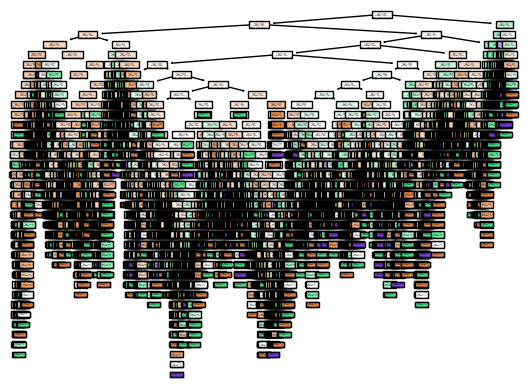

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier().fit(X_train, y_train)
plt.figure()
plot_tree(clf, filled = True)
plt.savefig('employee_decision_tree.svg', format = 'svg')

In [18]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuarcy of the model is: {accuracy}')


Accuarcy of the model is: 0.5971111111111111


In [19]:
labels  = clf.classes_
labels

array([0, 1, 2], dtype=int64)

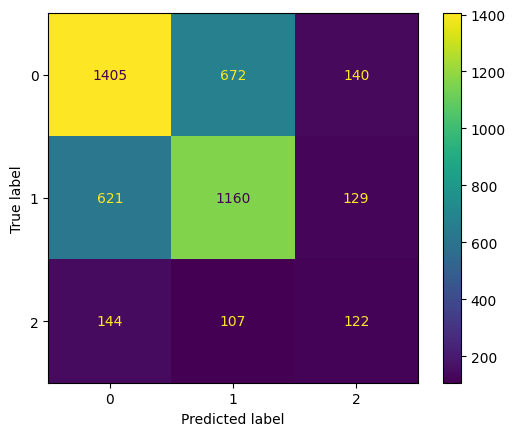

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()


In [21]:
params = clf.get_params()
print(params)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [22]:
print(clf.tree_.feature)  # Indices of features used for splitting
print(clf.tree_.threshold)  # Threshold values at each node


[ 4  0  4 ... -2 -2 -2]
[ 6.5         0.47499999  4.5        ... -2.         -2.
 -2.        ]


In [23]:
print(clf.feature_importances_)


[0.2294555  0.24770773 0.07924088 0.2997301  0.0522464  0.02809847
 0.00494255 0.05857837]


|--- time_spend_company <= 6.50
|   |--- satisfaction_level <= 0.47
|   |   |--- time_spend_company <= 4.50
|   |   |   |--- dept <= 0.50
|   |   |   |   |--- satisfaction_level <= 0.44
|   |   |   |   |   |--- average_montly_hours <= 109.50
|   |   |   |   |   |   |--- average_montly_hours <= 99.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- average_montly_hours >  99.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- average_montly_hours >  109.50
|   |   |   |   |   |   |--- average_montly_hours <= 272.50
|   |   |   |   |   |   |   |--- average_montly_hours <= 234.00
|   |   |   |   |   |   |   |   |--- satisfaction_level <= 0.42
|   |   |   |   |   |   |   |   |   |--- satisfaction_level <= 0.12
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- satisfaction_level >  0.12
|   |   |   |   |   |   |   |   |   |   |--- average_montly_hours <= 227.50
|   |   |   |   |   |   |   |   |   |   |   |-

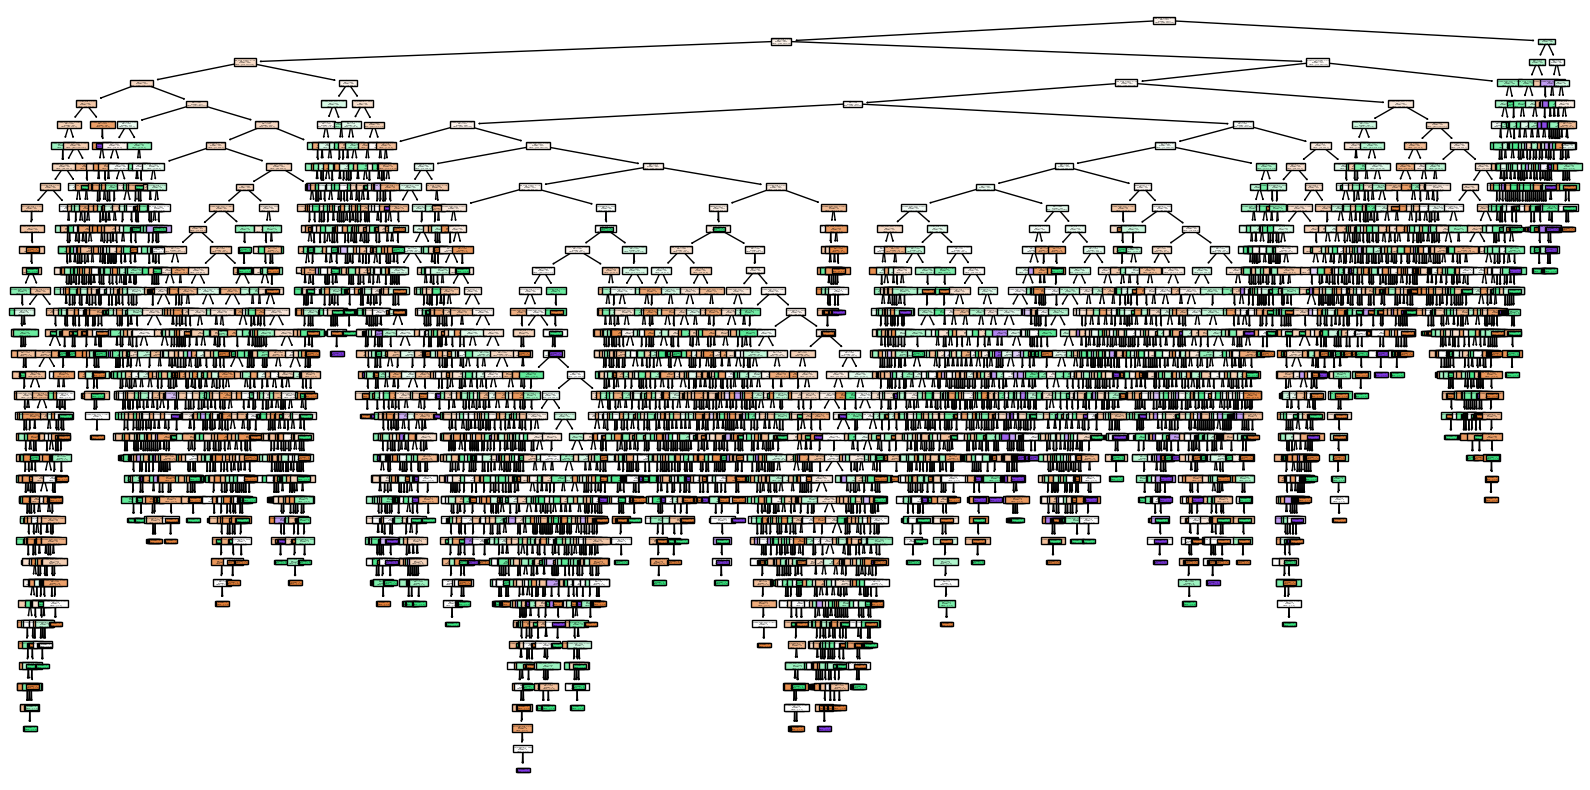

In [25]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Print a textual representation of the tree
print(export_text(clf, feature_names=input_features))

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=input_features, filled=True)
plt.show()

In [26]:
plt.savefig('employee_decision_tree_detailed.svg', format = 'svg')

<Figure size 640x480 with 0 Axes>